In [5]:
#Revised September 2019 - remove plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
#from mpl_toolkits.basemap import Basemap
import datetime
from scipy import signal

import matplotlib.dates as mdates
import glob, os

from matplotlib.backends.backend_pdf import PdfPages
import time

In [6]:
%matplotlib inline
plt.ion()

In [7]:
#full list
log_files=[
['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97intvl.csv','Initial A power check',[
    ['A1.1',pd.Timestamp('09:12:40')],
    ['Mains CB',pd.Timestamp('09:12:55')],
    ['A1.2',pd.Timestamp('09:13:49')],
    ['Controller',pd.Timestamp('09:13:55')],
    ['A1.3',pd.Timestamp('09:15:35')],
    ['A1.4 DC fan',pd.Timestamp('09:16:05')],
    ['A1.4 PSC?',pd.Timestamp('09:16:43')],
    ['A1.5',pd.Timestamp('09:17:28')],
    ['V.M Consumption',pd.Timestamp('09:18:33')]]],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/97intvl.csv','Repeat A power check',[
    ['A1.1',pd.Timestamp('10:12:54')],
    ['A1.2',pd.Timestamp('10:12:55')],
    ['A1.3',pd.Timestamp('10:13:35')],
    ['A1.4',pd.Timestamp('10:14:10')],
    ['A1.5',pd.Timestamp('10:15:38')],
    ['A1.6',pd.Timestamp('10:16:20')],
    ['A1.7',pd.Timestamp('10:16:35')],
    ['A1.8',pd.Timestamp('10:16:55')],
    ['A1.9',pd.Timestamp('10:17:20')]]],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_C 20elev/CSV/97intvl.csv','C power check 20 elev'],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_C 85elev/CSV/97intvl.csv','C power check 85 elev'],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv','D  power check']]

In [8]:
#Inrush  
#  recorded 30s window 10ms sampling rate?

#Inrush current fluctuations are captured in RMS at a fast 10ms sampling rate and displayed across a 30-second window

#def event_plotter(log_file):
#log_file=event_file[2]
def inrush_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file, header=0, na_values=' ----- ')
    #print(df)
    date_rng = pd.date_range(start=0, periods=3000, freq='10ms')
    #print(type(date_rng))
    i1=np.asarray( df['I1'] ).astype(float)
    i2=np.asarray( df['I2'] ).astype(float)
    i3=np.asarray( df['I3'] ).astype(float)
    
    print(len(i1))
    

    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,15))

    ax1.set(title=log_file + " => Inrush" , ylabel='Phase voltage [V]') 
    xlabel='Timestep [units]'
    ax1.set(title=log_file + " => " , ylabel='Phase current [I]') 
    ax1.plot(date_rng, i1)
    ax1.plot(date_rng, i2)
    ax1.plot(date_rng, i3)
    ymin=int(min([min(i1),min(i2),min(i3)])*1.25)
    ymax=int(max([max(i1),max(i2),max(i3)])*1.25)
    ystep=2
    ax1.set_yticks(range(ymin,ymax,ystep))
    ax1.set_ylim(ymin,ymax)
    #xmin=0
    #xmax=20
    #ax1.set_xlim(xmin,xmax)
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%S.%f')) 
    ax1.tick_params(axis='x', labelrotation=35)
    ax1.legend(['I1 [A]','I2 [A]','I3 [A]'])

    ax1.grid()
    fig.savefig(log_file + '_inrush1.png')

In [10]:
#Test A1_2

for line in log_files:
    mydir=line[0][0:line[0].rfind('/')+1]
    description=line[1]
    print(description, mydir)
    event_file=[file for file in glob.glob(mydir + "97inrush.csv")]
    event_file.sort()
    print(event_file)
    with PdfPages(mydir + '_inrush_' + description + '_' + str(int(time.time())) +'.pdf') as pdf:
        for file in event_file:
            inrush_plotter(file)
            pdf.savefig()  # saves the current figure into a pdf page
            plt.close()

Initial A power check /home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/
['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97inrush.csv']
/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97inrush.csv
3000
Repeat A power check /home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/
['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/97inrush.csv']
/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/97inrush.csv
3000
C power check 20 elev /home/pkotze/python/SKA-MPI Power measurements/power_test_C 20elev/CSV/
[]
C power check 85 elev /home/pkotze/python/SKA-MPI Power measurements/power_test_C 85elev/CSV/
[]
D  power check /home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/
[]


['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97inrush.csv']
/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97inrush.csv
3000


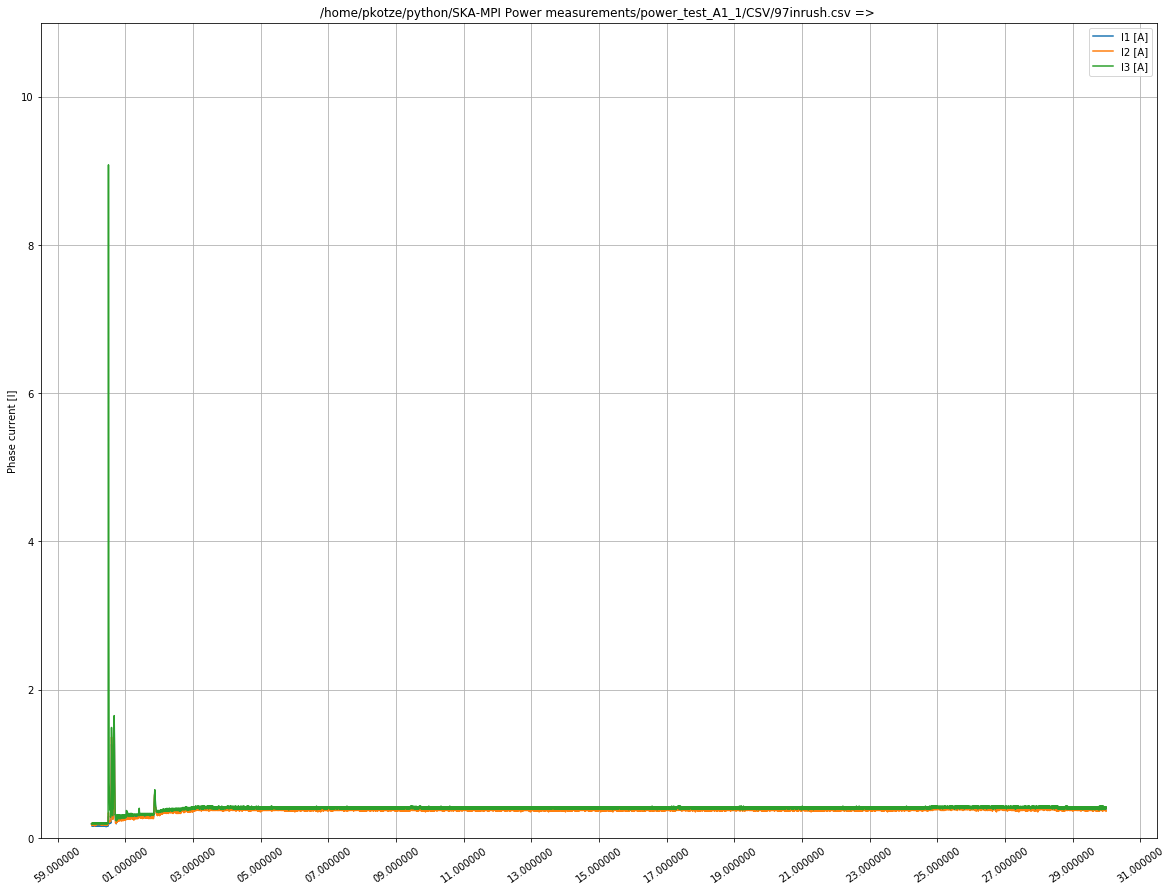

In [8]:
#Test A1_1
mydir='/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/'

event_file=[file for file in glob.glob(mydir + "97inrush.csv")]
event_file.sort()

#event_file.remove('97evt008.csv')

print(event_file)
for file in event_file:
    inrush_plotter(file)

['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/97inrush.csv']
/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/97inrush.csv
3000


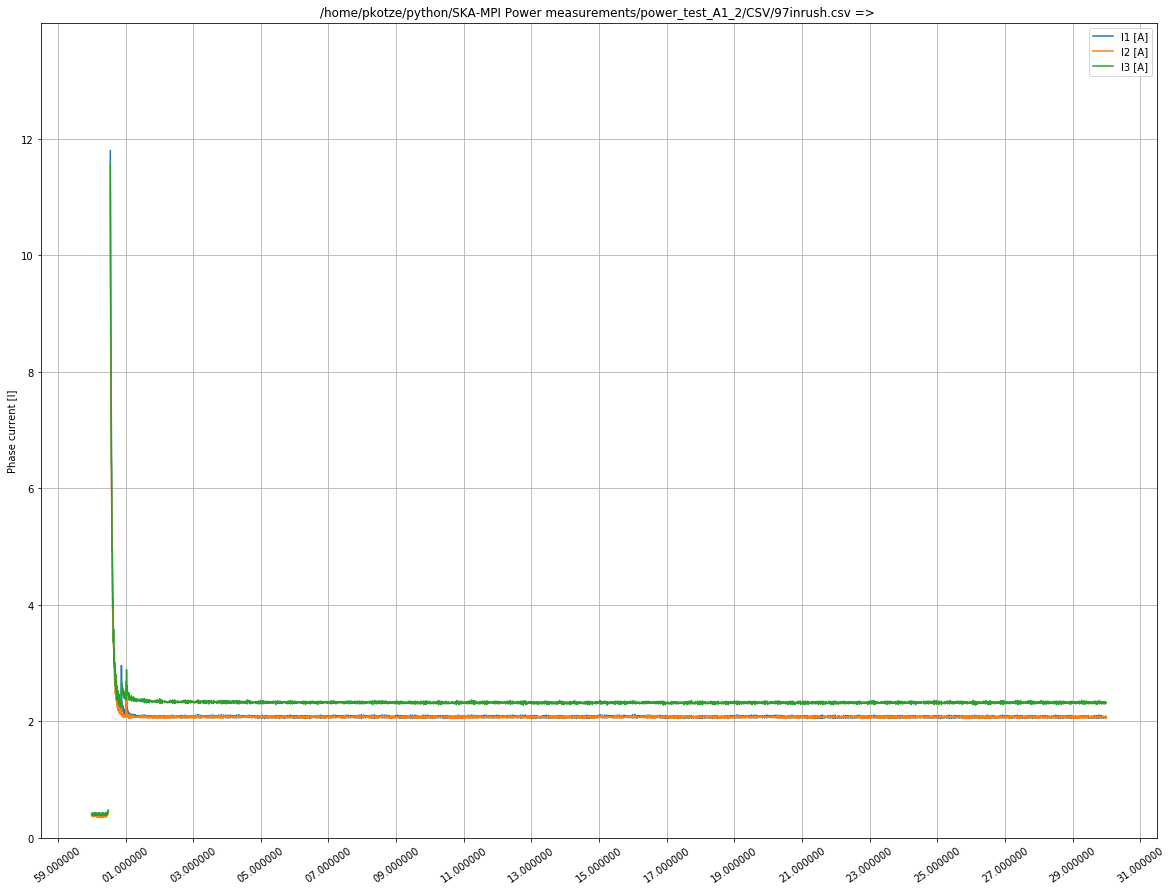

In [9]:
#Test A1_2
mydir='/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/'

event_file=[file for file in glob.glob(mydir + "97inrush.csv")]
event_file.sort()

#event_file.remove('97evt008.csv')

print(event_file)
for file in event_file:
    inrush_plotter(file)

Check timestamps step size to see if data average/interval was changed.